In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

In [6]:
data = pd.read_csv('Renewable_Energy_Adoption.csv')
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,adoption
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [18]:
X = data[['carbon_emissions', 'energy_output', 'renewability_index', 'cost_efficiency']]
y = data['adoption']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [26]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.85


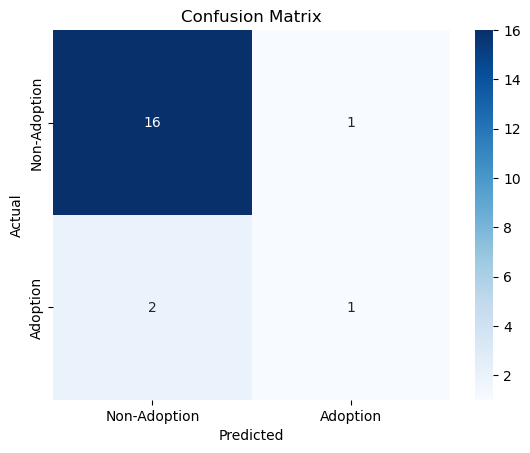

In [28]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Adoption', 'Adoption'], 
            yticklabels=['Non-Adoption', 'Adoption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(classification_report(y_test, y_pred, target_names=['Non-Adoption', 'Adoption']))

              precision    recall  f1-score   support

Non-Adoption       0.89      0.94      0.91        17
    Adoption       0.50      0.33      0.40         3

    accuracy                           0.85        20
   macro avg       0.69      0.64      0.66        20
weighted avg       0.83      0.85      0.84        20



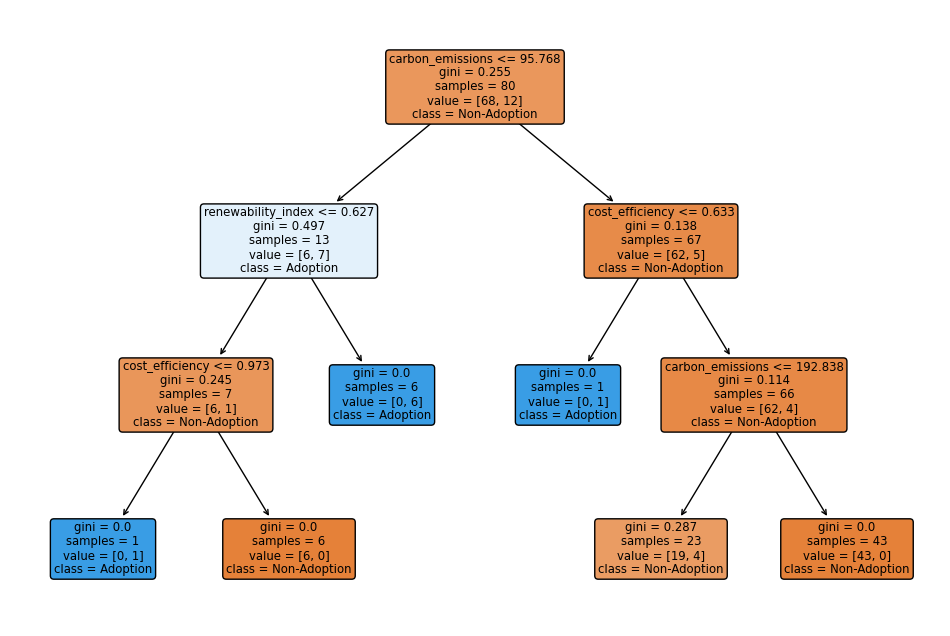

In [40]:
plt.figure(figsize=(12,8))
plot_tree(model,
          feature_names=X.columns,
          class_names=['Non-Adoption', 'Adoption'],
          filled=True, rounded=True)
plt.show()